<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana8/regresiones_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Ejercicio 1</h3>
<p>Costo en la industria de manufactura.</p>

<ul>
<li>Divide los datos del costo de manufactura. Utiliza la duncion train_test_split</li>
<ul>

In [170]:
#Importamos la base de datos y las librerias que vamos a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

#Revisamos la correlacion entre variables porque nos da un indice de linearidad y 
#de que tan funcional sera usar regression lineal con los datos
print('Correlacion entre variables')
print(df.corr())

#Separamos la variable objetivo de la caracteristica que usaremos para predecir
x = df['Number of Units']
y = df['Manufacturing Cost']

#El modelo de regresion lineal de Scikit-Learn's espera un input de 2D y de momento nuestros datos
#tienen una forma de 1D. Por lo que tenemos que reformar nuestros datos.
print('Forma de datos antes')
print('X: ',x.values.shape,'Y: ',y.values.shape)

#reformar
X = x.values.reshape(-1, 1)
Y = y.values.reshape(-1, 1)

print('Forma de datos despues')
print('X: ',X.shape,'Y_train: ',Y.shape)


#Por default obtenemos un 25% de datos reservados para testing
#Dado que el proceso de seleccion de datos es random, para evitar diferencias cada vez que 
#ejecutemos el algoritmo. Utilizaremos una constante SEED = 42
SEED = 42
(X_train, X_test, y_train, y_test) = train_test_split(X, Y,random_state=SEED)


Correlacion entre variables
                    Number of Units  Manufacturing Cost
Number of Units            1.000000           -0.760905
Manufacturing Cost        -0.760905            1.000000
Forma de datos antes
X:  (1000,) Y:  (1000,)
Forma de datos despues
X:  (1000, 1) Y_train:  (1000, 1)


<ul>
<li>Regression Lineal</li>
<ul>

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Entrenamos nuestro modelo en los datos de entrenamiento
regressor.fit(X_train, y_train)

print('Interseccion: ',regressor.intercept_)
print('Coeficiente: ',regressor.coef_)

#Revisemos las predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

#Comparamos las predicciones con los valores reales
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Prediccion': y_pred.squeeze()})
print(df_preds)



Interseccion:  [67.88519414]
Coeficiente:  [[-6.22507903]]
          Real  Prediccion
0    38.634483   39.755998
1    33.233497   34.987583
2    34.550609   34.937744
3    34.982985   36.569338
4    43.090662   41.850114
..         ...         ...
245  57.942993   50.041007
246  37.715435   41.573461
247  46.461065   51.676315
248  50.402065   51.241571
249  40.800063   44.616595

[250 rows x 2 columns]


<p>Errores y R^2</p>

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.73
Mean squared error: 39.90
Root mean squared error: 6.32
R^2: 0.58


<p>Graficamos los resultados</p>

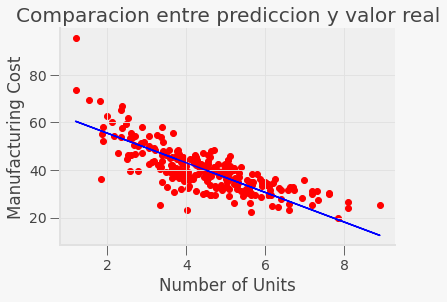

In [121]:
import matplotlib.pyplot as plot

plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Comparacion entre prediccion y valor real')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Regresion Polinomial</h3>

In [174]:
from sklearn.preprocessing import PolynomialFeatures


#Ejemplo con grado 2
poly_reg=PolynomialFeatures(degree=2)

#Entrenamos el Modelo
X_poly=poly_reg.fit_transform(X_train)


poly_reg.fit(X_poly,y_train)

poly_reg_model = LinearRegression()

poly_reg_model.fit(X_poly, y_train)

#Creamos la base polinomial de los datos de prueba
poly_test = poly_reg.fit_transform(X_test)

y_poly_pred = poly_reg_model.predict(poly_test)


In [175]:
mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.51
Mean squared error: 35.17
Root mean squared error: 5.93
R^2: 0.63


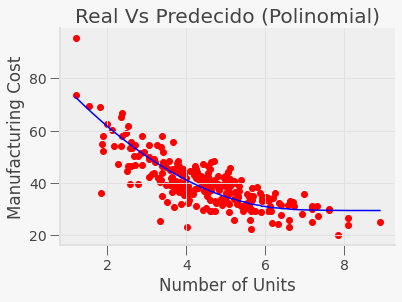

In [178]:

plot.scatter(X_test, y_test, color = 'red')
plot.plot(sorted(X_test), sorted(y_poly_pred,reverse=True), color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Ridge and Lasso Regression</h3>

In [125]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Modelo Ridge Regression 
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
y_pred = ridgeReg.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(ridgeReg.coef_))
print('Interseccion de la ecuacion: {}'.format(ridgeReg.intercept_))
print("\n")


print("El valor de entrenamiento para ridge es {}".format(train_score_ridge))
print("El valor de prueba para ridge es {}".format(test_score_ridge))


Modelo Ridge ............................................

Coeficiente de la ecuacion: [[-6.17811641]]
Interseccion de la ecuacion: [67.67536193]


El valor de entrenamiento para ridge es 0.5773917472599517
El valor de prueba para ridge es 0.5832526783114598


In [126]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.72
Mean squared error: 39.77
Root mean squared error: 6.31
R^2: 0.58


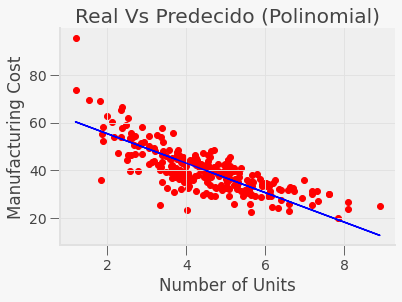

In [127]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

In [128]:
#Lasso regression model
print("\nModelo Lasso............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
y_pred = lasso.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(lasso.coef_))
print('Interseccion de la ecuacion: {}'.format(lasso.intercept_))
print("\n")

print("El valor de entrenamiento para Lasso es  {}".format(train_score_ls))
print("El valor de prueba para Lasso es  {}".format(test_score_ls))


Modelo Lasso............................................


Modelo Ridge ............................................

Coeficiente de la ecuacion: [-0.5239936]
Interseccion de la ecuacion: [42.41235616]


El valor de entrenamiento para Lasso es  0.09311771941960012
El valor de prueba para Lasso es  0.10755887340772496


In [129]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 6.78
Mean squared error: 85.18
Root mean squared error: 9.23
R^2: 0.11


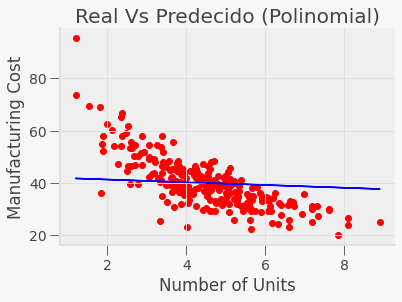

In [130]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Concluisiones:</h3>
<p>Utilizamos 25% para los datos de prueba<p>
<p>El modelo que conviene usar para esta base de datos es una regresion polinomial de grado 2. Todas las medidas de error se ven reducidas con este metodo y la R^2 es mas cercana a 1.</p>
<p>Ademas los metodos de Ridge y Lasso no son necesarios en este caso ya que tenemos suficientes instancias para entrenar a los modelos.</p>

<h2>Ejercicio 2</h2>
<h3>Regresion Multiple</h3>
<p>Con los datos de las casas</p>

In [131]:
#importamos la base de datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')

#Informacion general de los datos
print(df.info())

#Revisamos la cantidad de datos nulos que tenemos
print(df.isnull().sum())

#Revisamos la organizacion de los datos
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p>Limpieza de datos</p>

In [132]:
#Removemos manualmente los datos categoricos que no nos ayudaran en nuestras regresiones

#Date es inecesario para este caso
df.drop('date', inplace=True, axis=1)

#zipcode no tiene una logica lineal y es mas bien un dato categorico que tendria que ser analizado de otra manera
df.drop('zipcode', inplace=True, axis=1)

#igualmente lat
df.drop('lat', inplace=True, axis=1)

#y long
df.drop('long', inplace=True, axis=1)

#El id no aporta informacion
df.drop('id', inplace=True, axis=1)

#Podemos quedarnos con sqft_living15 
df.drop('sqft_living', inplace=True, axis=1)

#y tambien con sqft_lot15
df.drop('sqft_lot', inplace=True, axis=1)

df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,1800,7503


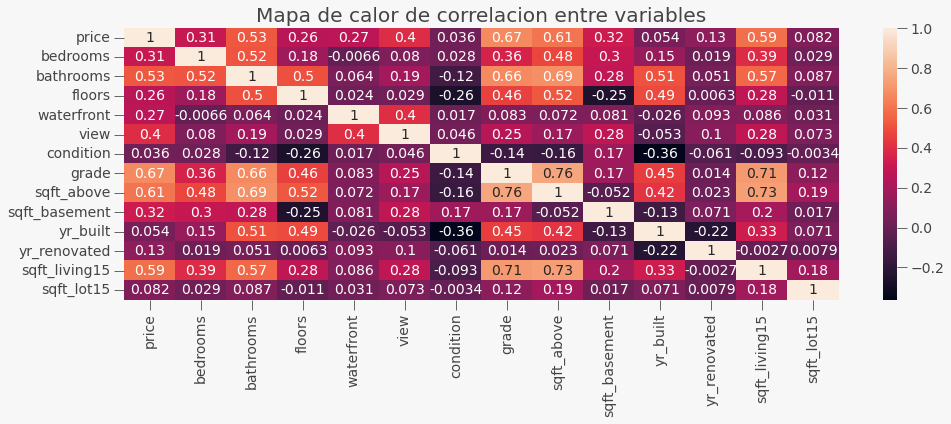

In [133]:
import seaborn as sns # Convention alias for Seaborn
plot.figure(figsize = (16,5))

correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Mapa de calor de correlacion entre variables');

<p>Separamos los datos</p>

In [134]:
#Variable objetivo
y = df['price']

#Caracteristicas
X = df[['bedrooms',	'bathrooms',	'floors',	'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'sqft_living15',	'sqft_lot15']]

#Separacion en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=SEED)
#Regresion lineal multiple
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Interseccion
print(regressor.intercept_)

#Coeficiente
print(regressor.coef_)


6253192.638267014
[-3.82339495e+04  4.78360292e+04  2.70676837e+04  5.51415627e+05
  4.43392828e+04  1.58426520e+04  1.17722812e+05  1.58579904e+02
  1.65360222e+02 -3.58808661e+03  1.35998036e+01  2.51893823e+01
 -5.42218324e-01]


<p>Predicciones, errores y graficas</p>

In [135]:
y_pred = np.around(regressor.predict(X_test),2)
results = pd.DataFrame({'Valor real': y_test, 'Prediccion': y_pred})
print(results)

       Valor real  Prediccion
735      365000.0   525524.31
2830     865000.0   683375.93
4106    1038000.0  1225778.23
16218   1490000.0  1586067.93
19964    711000.0   687582.81
...           ...         ...
11144    650000.0   775030.42
17803    705000.0   573294.25
268      272500.0   553971.92
518     2250000.0  1372884.69
8482     330000.0   480205.98

[5404 rows x 2 columns]


In [136]:
#Errores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

#R cuadrada
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

Mean absolute error: 142337.92
Mean squared error: 51005030409.17
Root mean squared error: 225842.93
R²: 0.6590290764933266


<h4>Multiple polonomial</h4>

In [137]:
degree=2

#Creamos una nueva matriz con las combinaciones polinomiales de las caracteristicas. Con grados menores o igual a degree
poly_model = PolynomialFeatures(degree=degree)

# transformamos las caracteristicas
poly_x_values = poly_model.fit_transform(X_train)

# transformamos para los datos de prueba
poly_x_values_test = poly_model.fit_transform(X_test)



In [138]:
# Entrenamos el modelo
poly_model.fit(poly_x_values, y_train)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_train)

y_pred = regression_model.predict(poly_x_values_test)


In [139]:
#Errores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

#R cuadrada
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

Mean absolute error: 128692.20
Mean squared error: 40466292367.08
Root mean squared error: 201162.35
R²: 0.7294810145468695


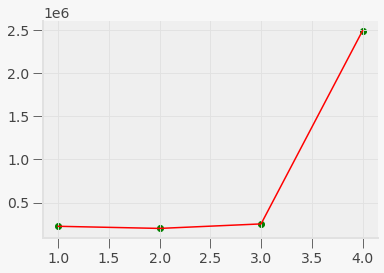

In [140]:
number_degrees = [1,2,3,4]
plt_mean_squared_error = []
for degree in number_degrees:
   poly_model = PolynomialFeatures(degree=degree)

   poly_x_values = poly_model.fit_transform(X_train)

   poly_model.fit(poly_x_values, y_train)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_train)
   poly_x_values_test = poly_model.fit_transform(X_test)
   y_pred = regression_model.predict(poly_x_values_test)
  
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))
  
plot.scatter(number_degrees,plt_mean_squared_error, color="green")
plot.plot(number_degrees,plt_mean_squared_error, color="red") 

<h3>Ridge y Lasso</h3>

In [141]:
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
y_pred = ridgeReg.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(ridgeReg.coef_))
print('Interseccion de la ecuacion: {}'.format(ridgeReg.intercept_))
print("\n")


print("El valor de entrenamiento para ridge es {}".format(train_score_ridge))
print("El valor de prueba para ridge es {}".format(test_score_ridge))


Modelo Ridge ............................................

Coeficiente de la ecuacion: [-3.84408562e+04  4.77879414e+04  2.70677633e+04  4.98987429e+05
  4.65480639e+04  1.58808816e+04  1.17358544e+05  1.59200021e+02
  1.65512358e+02 -3.58507453e+03  1.42053631e+01  2.49356545e+01
 -5.41500195e-01]
Interseccion de la ecuacion: 6249852.497763605


El valor de entrenamiento para ridge es 0.6513093424275317
El valor de prueba para ridge es 0.6583872021443291


In [142]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 142397.19
Mean squared error: 51101046868.15
Root mean squared error: 226055.41
R^2: 0.66


In [143]:
#Lasso regression model
print("\nModelo Lasso............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
y_pred = lasso.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(lasso.coef_))
print('Interseccion de la ecuacion: {}'.format(lasso.intercept_))
print("\n")

print("El valor de entrenamiento para Lasso es  {}".format(train_score_ls))
print("El valor de prueba para Lasso es  {}".format(test_score_ls))


Modelo Lasso............................................


Modelo Ridge ............................................

Coeficiente de la ecuacion: [-3.82215166e+04  4.77978669e+04  2.70230451e+04  5.49785484e+05
  4.43950913e+04  1.58145383e+04  1.17705777e+05  1.58626899e+02
  1.65379365e+02 -3.58760358e+03  1.36258135e+01  2.51817394e+01
 -5.42288626e-01]
Interseccion de la ecuacion: 6252495.1519059595


El valor de entrenamiento para Lasso es  0.6514332285377904
El valor de prueba para Lasso es  0.6590109290862542


In [144]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 142340.42
Mean squared error: 51007745036.68
Root mean squared error: 225848.94
R^2: 0.66


<h3>Conclusiones:</h3>
<p>Utilizamos 25% para los datos de prueba<p>
<p>El modelo que tiene un mejor desempeño es el de regresion polinomial con exponente 2. Si incrementamos el grado del exponente empezamos a ver un aumento en el error. Ridge y Lasso tienen un desempeño muy parecido, incluso un poco mejor que la regresion lineal simple</p>

<br>

<h1>K Means</h1>
Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [145]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
from tqdm import tqdm
%matplotlib inline
import geopandas

#Importamos la base de datos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)
df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

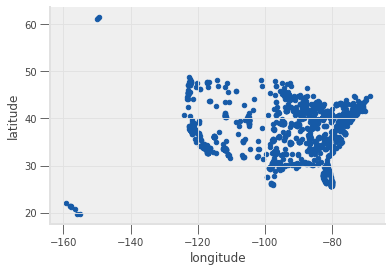

In [147]:
#Vizualizamos los datos
latlong=df[["latitude","longitude"]]
latlong.plot.scatter( "longitude","latitude")


In [148]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline


# activate plot theme
import qeds
qeds.themes.mpl_style();
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [149]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [150]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [151]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

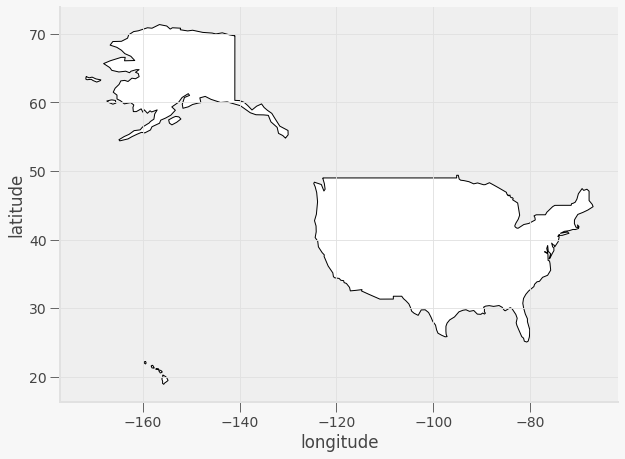

In [152]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

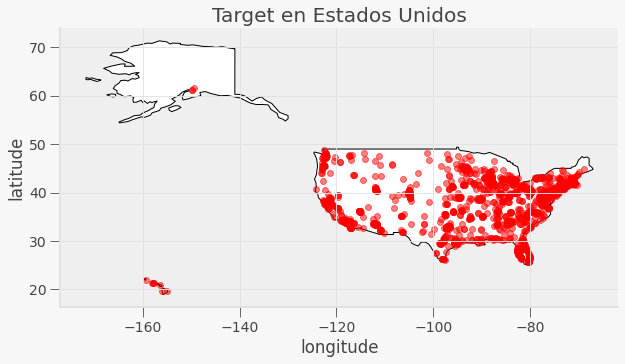

In [153]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

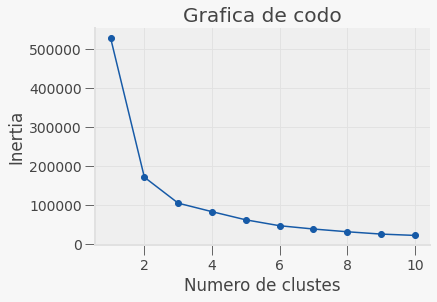

In [154]:
from sklearn.cluster import KMeans
inertias = []
features = df[['latitude','longitude']]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state =SEED)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Grafica de codo')
plt.xlabel('Numero de clustes')
plt.ylabel('Inertia')
plt.show()

<p>Notamos que el codo esta entre dos y 3 clusters. Pero lo mas optimo es usar 7 para reducir la inercia y considerar casos aislados donde seria dificil tener un solo deposito para ubicaciones muy diferentes</p>

In [155]:
kmeans = KMeans(n_clusters=7,random_state =SEED)
kmeans.fit(features)
kmeans.cluster_centers_

array([[  40.34365502,  -75.58507975],
       [  35.533669  , -117.20456253],
       [  34.37175105,  -98.15169381],
       [  31.09185688,  -82.85820206],
       [  46.88195312, -122.22224328],
       [  20.94542771, -157.31225085],
       [  41.7454415 ,  -88.35163457]])

In [156]:
labels = kmeans.labels_
# Guardamos el numero que corresponde a cada tienda con respecto al cluster
df['cluster'] = labels

#Guardamos el color que corresponde a cada cluster
# df['clusterColor'] = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred']

print('Cantidad de tiendas por cluster')
_clusters = df.groupby('cluster')['name'].count()
print(_clusters)


Cantidad de tiendas por cluster
cluster
0    480
1    285
2    296
3    270
4     77
5      8
6    423
Name: name, dtype: int64


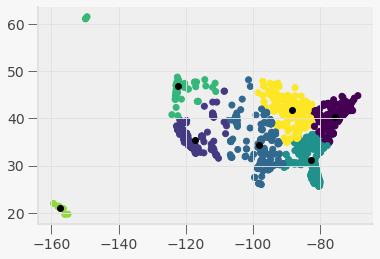

In [157]:
plt.scatter(df['longitude'],df['latitude'], c=kmeans.labels_)
#Los centros de abastecimiento
plt.scatter(kmeans.cluster_centers_[:][:,1],kmeans.cluster_centers_[:][:,0],c='black')
plt.show()

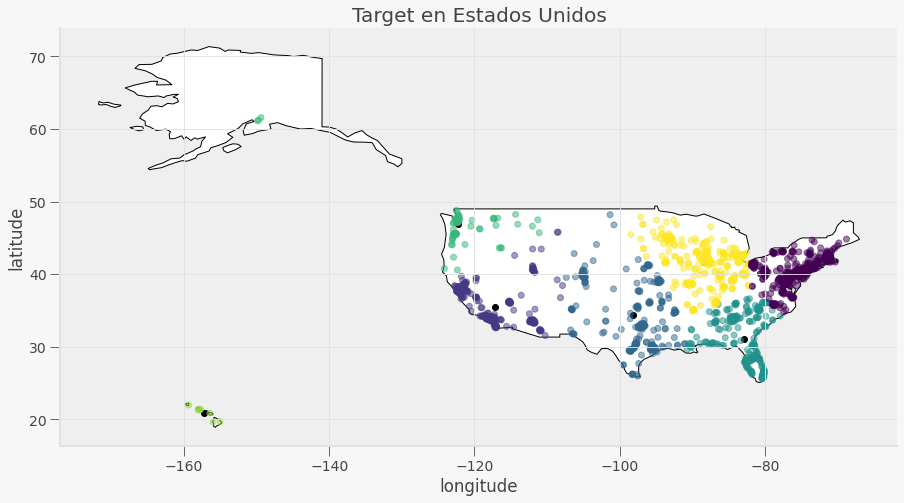

In [159]:
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

#Preparamos los centros que obtuvimos con K-means. A modo de datos que pueda utilizar geopandas
df_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns = ['latitude','longitude'])
df_centers['Coordinates'] = list(zip(df_centers.longitude,df_centers.latitude))
df_centers['Coordinates'] = df_centers['Coordinates'].apply(Point)
df_centers = gpd.GeoDataFrame(df_centers,geometry = 'Coordinates')
#graficamos los centros de los clusters, que en este caso representan las ubicaciones de los almacenes
df_centers.plot(ax =gax, edgecolor='black', color='black')
#Graficamos las tiendas con su color correspondiente al cluster al que pertenecen
gdf.plot(ax=gax, c=kmeans.labels_, alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()